In [7]:
# https://isquared.digital/blog/2021-05-02-cellular-automata/

# Celular Automata  - Simplest Model

In [17]:
import numpy as np

powers_of_two = np.array([[4], [2], [1]])  # shape (3, 1)

def step(x, rule_binary):
    """Makes one step in the cellular automaton.
    Args:
        x (np.array): current state of the automaton
        rule_binary (np.array): the update rule
    Returns:
        np.array: updated state of the automaton
    """
    x_shift_right = np.roll(x, 1)  # circular shift to right
    x_shift_left = np.roll(x, -1)  # circular shift to left
    y = np.vstack((x_shift_right, x, x_shift_left)).astype(np.int8)  # stack row-wise, shape (3, cols)
    z = np.sum(powers_of_two * y, axis=0).astype(np.int8)  # LCR pattern as number

    return rule_binary[7 - z]


In [18]:

import numpy as np

def cellular_automaton(rule_number, size, steps,
                       init_cond='random', impulse_pos='center'):
    """Generate the state of an elementary cellular automaton after a pre-determined
    number of steps starting from some random state.
    Args:
        rule_number (int): the number of the update rule to use
        size (int): number of cells in the row
        steps (int): number of steps to evolve the automaton
        init_cond (str): either `random` or `impulse`. If `random` every cell
        in the row is activated with prob. 0.5. If `impulse` only one cell
        is activated.
        impulse_pos (str): if `init_cond` is `impulse`, activate the
        left-most, central or right-most cell.
    Returns:
        np.array: final state of the automaton
    """
    assert 0 <= rule_number <= 255
    assert init_cond in ['random', 'impulse']
    assert impulse_pos in ['left', 'center', 'right']
    
    rule_binary_str = np.binary_repr(rule_number, width=8)
    rule_binary = np.array([int(ch) for ch in rule_binary_str], dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    
    if init_cond == 'random':  # random init of the first step
        x[0, :] = np.array(np.random.rand(size) < 0.5, dtype=np.int8) # Replace the first row with an intial condition, this creates a random start of ones and 0

    if init_cond == 'impulse':  # starting with an initial impulse
        if impulse_pos == 'left':
            x[0, 0] = 1
        elif impulse_pos == 'right':
            x[0, size - 1] = 1
        else:
            x[0, size // 2] = 1
    
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_binary) # This is where we use the Step Function to update the step bae of the rulle
    
    return x

In [12]:
rule_binary_str=np.binary_repr(255, width=8)

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [52]:
  cellular_automaton(1,10,20,init_cond='random', impulse_pos='center')



array([[0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int8)

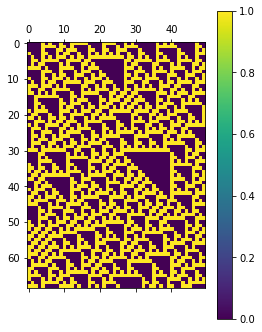

In [101]:
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(cellular_automaton(60,50,70,init_cond='random', impulse_pos='center')[1:]);
plt.colorbar()
plt.show()